In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('states_all.csv')

In [5]:
# Q1

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [6]:
df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,NaN,NaN,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,NaN,NaN,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,NaN,NaN,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000


In [7]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [8]:
# total null values
df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [9]:
#Q2

In [16]:
stateCalifornia = df[df['STATE'] == 'CALIFORNIA']
stateCali_rev_exp = stateCalifornia[['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].copy()
stateCali_rev_exp.head()




,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
4,1992,26260025.0,27138832.0
55,1993,28043338.0,28110986.0
106,1994,23440845.0,23012688.0
157,1995,29512214.0,30097549.0
208,1996,31282981.0,31561692.0


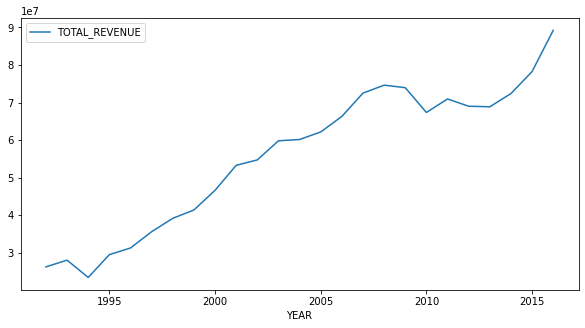

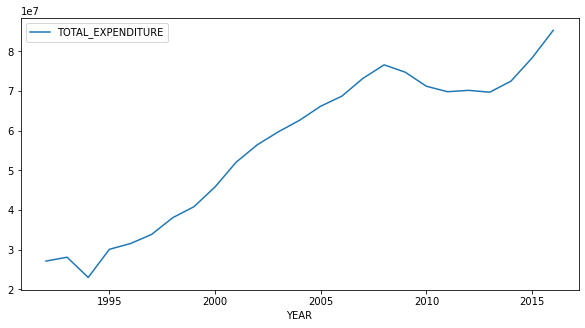

In [17]:
# plot revenue vs expenditure
stateCali_rev_exp.plot(x='YEAR', y='TOTAL_REVENUE', kind='line', figsize=(10,5))
plt.show()
stateCali_rev_exp.plot(x='YEAR', y='TOTAL_EXPENDITURE', kind='line', figsize=(10,5))
plt.show()




In [18]:
# 1994 is the lowest year. The revenue and expenditure are very low.
# 2008 is the peak. With 2008 crisis, both revenue and expenditure goes down till 2013.
# In the year 2015, it catches 2008 peak again. Then it goes up again.



In [19]:
# Q3

In [36]:
cali_math_read = stateCalifornia[['YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].copy()
cali_math_read

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,197.0,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,NaN,NaN,NaN,NaN
259,1997,NaN,NaN,NaN,NaN
310,1998,NaN,NaN,202.0,252.0
361,1999,NaN,NaN,NaN,NaN
412,2000,213.0,260.0,NaN,NaN
463,2001,NaN,NaN,NaN,NaN


In [37]:
# too many null values
cali_math_read.isnull().sum()

YEAR                    0
AVG_MATH_4_SCORE       22
AVG_MATH_8_SCORE       21
AVG_READING_4_SCORE    20
AVG_READING_8_SCORE    22
dtype: int64

In [38]:
# mean of each column
cali_math_read.mean()

YEAR                   2002.030303
AVG_MATH_4_SCORE        227.909091
AVG_MATH_8_SCORE        269.166667
AVG_READING_4_SCORE     208.230769
AVG_READING_8_SCORE     255.000000
dtype: float64

In [39]:
# They are better at Math.

In [40]:
#Q4

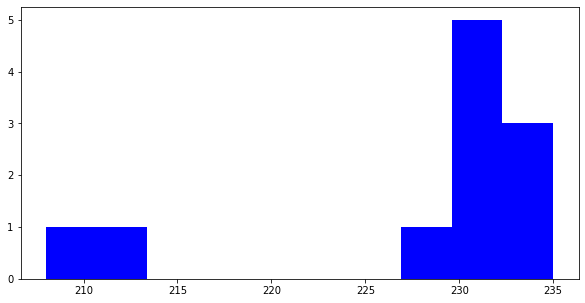

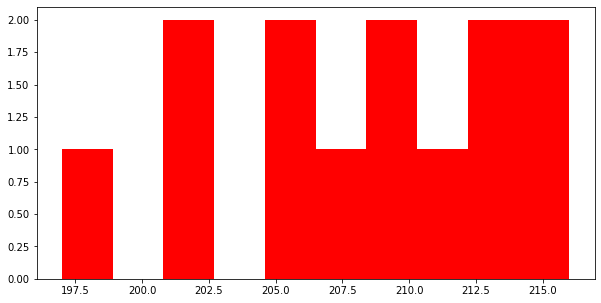

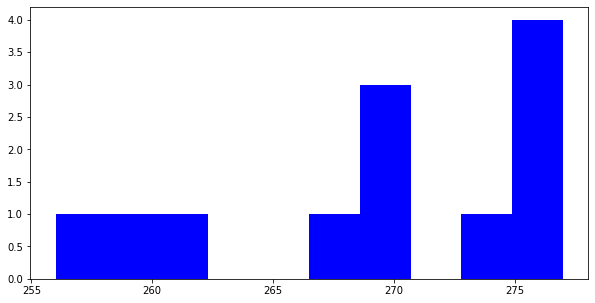

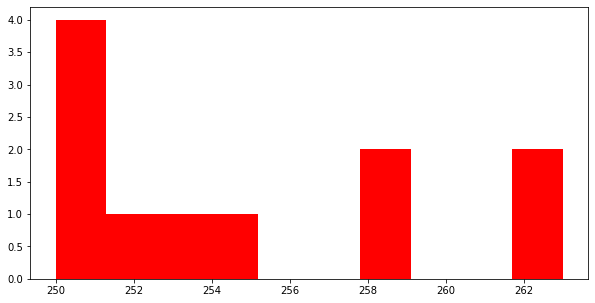

In [46]:
# histogram for math and reading
plt.figure(figsize=(10,5))
plt.hist(cali_math_read['AVG_MATH_4_SCORE'], bins=10, color='blue', label='Math')
plt.show()
plt.figure(figsize=(10,5))
plt.hist(cali_math_read['AVG_READING_4_SCORE'], bins=10, color='red', label='Reading')
plt.show()
plt.figure(figsize=(10,5))
plt.hist(cali_math_read['AVG_MATH_8_SCORE'], bins=10, color='blue', label='Math')
plt.show()
plt.figure(figsize=(10,5))
plt.hist(cali_math_read['AVG_READING_8_SCORE'], bins=10, color='red', label='Reading')
plt.show()



In [47]:
# Q5

In [57]:
df = pd.read_csv('states_all.csv')
stateCalifornia = df[df['STATE'] == 'CALIFORNIA']
cali_math_read = stateCalifornia[['YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].copy()
cali_math_read


,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.0,261.0,202.0,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,197.0,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,NaN,NaN,NaN,NaN
259,1997,NaN,NaN,NaN,NaN
310,1998,NaN,NaN,202.0,252.0
361,1999,NaN,NaN,NaN,NaN
412,2000,213.0,260.0,NaN,NaN
463,2001,NaN,NaN,NaN,NaN


In [58]:
# descriptive statistics
cali_math_read.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,11.000000,12.000000,13.000000,11.000000
mean,2002.030303,227.909091,269.166667,208.230769,255.000000
std,9.722670,8.960519,6.965282,5.614770,4.898979
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,228.500000,265.500000,206.000000,251.000000
50%,2002.000000,232.000000,270.000000,209.000000,253.000000
75%,2010.000000,233.000000,275.250000,213.000000,259.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [59]:
# null values
cali_math_read.isnull().sum()

YEAR                    0
AVG_MATH_4_SCORE       22
AVG_MATH_8_SCORE       21
AVG_READING_4_SCORE    20
AVG_READING_8_SCORE    22
dtype: int64

In [60]:
# filling null values with mean
cali_math_read.fillna(cali_math_read.mean(), inplace=True)


In [61]:
# descriptive statistics
cali_math_read.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2002.030303,227.909091,269.166667,208.230769,255.000000
std,9.722670,5.009083,4.083758,3.438330,2.738613
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,227.909091,269.166667,208.230769,255.000000
50%,2002.000000,227.909091,269.166667,208.230769,255.000000
75%,2010.000000,227.909091,269.166667,208.230769,255.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [64]:
# original dataframe
df = pd.read_csv('states_all.csv')
stateCalifornia = df[df['STATE'] == 'CALIFORNIA']
cali_math_read = stateCalifornia[['YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].copy()
# filling with median
cali_math_read.fillna(cali_math_read.median(), inplace=True)
# descriptive statistics
cali_math_read.describe()


,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2002.030303,230.636364,269.696970,208.696970,253.666667
std,9.722670,5.378302,4.103998,3.459451,2.901149
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,232.000000,270.000000,209.000000,253.000000
50%,2002.000000,232.000000,270.000000,209.000000,253.000000
75%,2010.000000,232.000000,270.000000,209.000000,253.000000
max,2019.000000,235.000000,277.000000,216.000000,263.000000


In [65]:
# original dataframe
df = pd.read_csv('states_all.csv')
stateCalifornia = df[df['STATE'] == 'CALIFORNIA']
cali_math_read = stateCalifornia[['YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].copy()
# filling with interpolation
cali_math_read.fillna(cali_math_read.interpolate(), inplace=True)
# descriptive statistics
cali_math_read.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,33.000000,33.000000,33.000000,33.000000,27.000000
mean,2002.030303,225.272727,266.772727,208.318182,255.962963
std,9.722670,9.782593,6.094267,5.654876,4.865352
min,1986.000000,208.000000,256.000000,197.000000,250.000000
25%,1994.000000,213.000000,260.750000,204.000000,251.000000
50%,2002.000000,231.000000,267.000000,209.500000,255.000000
75%,2010.000000,232.000000,271.500000,213.250000,260.500000
max,2019.000000,235.000000,277.000000,216.000000,263.000000
